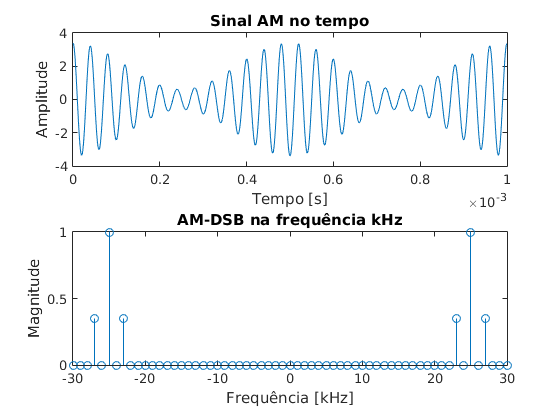

In [1]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ac = 2;                                                         % Amplitude da portadora
Mu = 0.7;                                                       % Índice de modulação
fc = 25000;                                                     % Frequência da portadora Hz
fm = 2000;                                                      % Frequência do sinal Hz
Ts = 1e-6;                                                      % Tempo de amostragem pequeno (modelar sinal contínuo)
t = [0:999]*Ts;                                                 % Definição do vetor tempo
s = Ac*(1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                   % Modulação AM      

%% Cálculo da FFT de AM-DSB
lfft=30;                                                        % Número de elementos da fft
k = [-lfft:lfft];                                               % Vetor de frequências 
Nx = length(s);                                                 % Comprimento do sinal modulado
Nk = length(k);                                                 % Comprimento do sinal em frequência
Xk = fft(s)/Nx;                                                 % Cálculo da FFT

%% A fft em 30 pontos (para melhor visualização)
c = zeros(1,Nk);                                                % Inicialização do vetor da magnitude
fsampling = 1/Ts;                                               % Taxa de amostragem
freq = k*fsampling/Nx;                                          % Eixo de frequências
for i = 1:Nk-1
    kk = k(i);
    if (kk >= 0),
        c(i) = Xk(kk+1);
    else
        c(i) = Xk(Nx+1+kk);
    end
end

%% Gráficos
subplot(2,1,1);
plot (t,s);                                                     % Gráfico do AM-DSB no tempo
title('Sinal AM no tempo');
xlabel('Tempo [s]');
ylabel('Amplitude');
subplot(2,1,2);
stem(freq/1e3,real(c));                                         % Gráfico do AM-DSB na frequência
title('AM-DSB na frequência kHz');                             
xlabel('Frequência [kHz]');
ylabel('Magnitude');
axis([-30 30 0 1]);

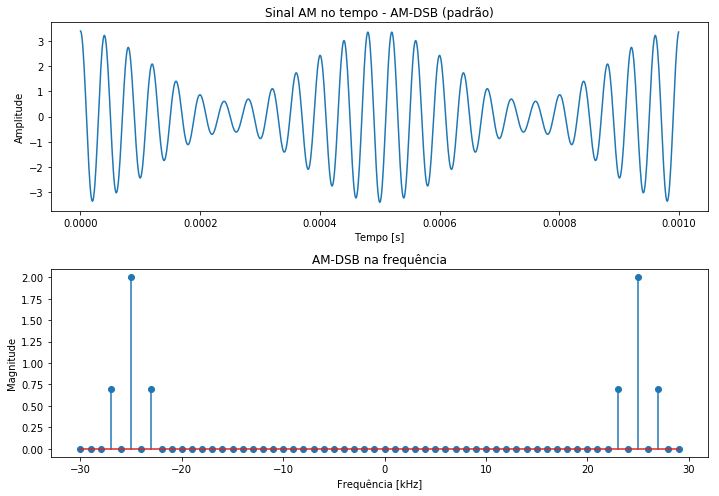

In [1]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 0.7                                                       # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f = 2.0*np.abs((fftpack.fft(s)))/N                           # Cálculo da FFT
Ns = len(s)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]

# Gráfico do AM-DSB no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t,s)
plt.title("Sinal AM no tempo - AM-DSB (padrão)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

# Gráfico do AM-DSB na frequência
plt.subplot(212)
plt.title("AM-DSB na frequência")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f_new)
plt.tight_layout()
plt.show()

